In [31]:
import os
import sys
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [32]:
# Change the working directory to the parent directory to allow importing the segadb package.
notebook_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(notebook_dir, '..', '..'))
sys.path.append(parent_dir)

from sega_learn.neural_networks import *

# print(f"Working directory: {notebook_dir}")
# print(f"Parent directory: {parent_dir}")

In [33]:
def time_function(func, num_repeats, *args, **kwargs):
    times = []
    for _ in range(num_repeats):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        times.append(end_time - start_time)
    avg_time = np.mean(times)
    stddev_time = np.std(times)
    return avg_time, stddev_time, result

In [34]:
from test_nn import *
from test_nn_cupy import *

## Run Time Comparison of Neural Network Implementations
### Comparison of CPU (numpy) and CPU (cupy) implementations

In [60]:
# Constants for testing
num_repeats = 10

# Neural Network Timing
nnt_layer_sizes_multiplier = 5
nnt_dataset_size = 100_000

# Optimizer Timing
optt_layer_sizes_multiplier = 25

# Loss Function Timing
losst_layer_sizes_multiplier = 10
losst_dataset_size = 1_000_000

# Train Epoch Timing
epocht_layer_sizes_multiplier = 2
epocht_dataset_sizes = [1_000, 5_000, 10_000, 50_000, 100_000, 250_000, 500_000]

#### Neural Network Timing

In [36]:
print("Base NN Timing Implementation:")
nn_base = time_nn_base(num_repeats, nnt_layer_sizes_multiplier, nnt_dataset_size)

print("\n\nCuPy NN Timing Implementation:")
nn_cupy = time_nn_cupy(num_repeats, nnt_layer_sizes_multiplier, nnt_dataset_size)

Base NN Timing Implementation:

Timing results for NeuralNetwork methods (averaged over 10 runs):
Performance for Layer sizes: [500, 250, 50], Dataset size: 100,000 samples
----------------------------------------------------------------------------------------------------
Function            : Average Time (s) ±  Std Dev (s)
forward             : 0.861612 seconds ± 0.028566 seconds
apply_dropout       : 1.029888 seconds ± 1.064924 seconds
backward            : 0.518041 seconds ± 0.035289 seconds
calculate_loss      : 0.624800 seconds ± 0.033194 seconds
evaluate            : 0.481259 seconds ± 0.025699 seconds
train (X,y Reduced) : 0.961601 seconds ± 0.022472 seconds


CuPy NN Timing Implementation:

Timing results for NeuralNetwork methods (averaged over 10 runs):
Performance for Layer sizes: [500, 250, 50], Dataset size: 100,000 samples
----------------------------------------------------------------------------------------------------
Function            : Average Time (s) ±  Std De

#### Optimizer Timing

In [37]:
print("Base NN Optimizer Implementation:")
nn_optimizer_times = time_nn_optimizer(num_repeats, optt_layer_sizes_multiplier)

print("\n\nCuPy NN Optimizer Implementation:")
nn_optimizer_times_cupy = time_nn_optimizer_cupy(num_repeats, optt_layer_sizes_multiplier)

Base NN Optimizer Implementation:

Timing results for Optimizer methods (averaged over 10 runs):
Performance for Layer sizes: [2500, 1875, 1250, 625]
----------------------------------------------------------------------------------------------------
Optimizer Function       : Average Time (s) ±  Std Dev (s)
Adam_initialize          : 0.028701 seconds ± 0.005180 seconds
SGD_initialize           : 0.015333 seconds ± 0.001817 seconds
Adadelta_initialize      : 0.021181 seconds ± 0.002094 seconds
----------------------------------------------------------------------
Adam_update              : 0.294172 seconds ± 0.030372 seconds
SGD_update               : 0.104611 seconds ± 0.015877 seconds
Adadelta_update          : 0.329264 seconds ± 0.042245 seconds


CuPy NN Optimizer Implementation:

Timing results for Optimizer methods (averaged over 10 runs):
Performance for Layer sizes: [2500, 1875, 1250, 625]
-----------------------------------------------------------------------------------------

#### Loss Function Timing

In [38]:
print("Base NN Loss Implementation:")
nn_loss_base = time_nn_loss(num_repeats, losst_layer_sizes_multiplier, losst_dataset_size)

print("\n\nCuPy NN Loss Implementation:")
nn_loss_cupy = time_nn_loss_cupy(num_repeats, losst_layer_sizes_multiplier, losst_dataset_size)

Base NN Loss Implementation:

Timing results for Loss functions (averaged over 10 runs):
Performance for Layer sizes: [1000, 500, 100], Dataset size: 1,000,000 samples
----------------------------------------------------------------------------------------------------
Loss Function            : Average Time (s) ±  Std Dev (s)
CrossEntropyLoss         : 2.419396 seconds ± 0.059061 seconds
BCEWithLogitsLoss        : 0.042899 seconds ± 0.003754 seconds


CuPy NN Loss Implementation:

Timing results for Loss functions (averaged over 10 runs):
Performance for Layer sizes: [1000, 500, 100], Dataset size: 1,000,000 samples
----------------------------------------------------------------------------------------------------
Loss Function            : Average Time (s) ±  Std Dev (s)
CrossEntropyLoss         : 1.158153 seconds ± 0.225169 seconds
BCEWithLogitsLoss        : 0.004001 seconds ± 0.000448 seconds


#### Epoch Timings

In [61]:
print("Base NN Single Epoch Implementation:")
nn_epoch_base = time_nn_epoch(num_repeats, epocht_layer_sizes_multiplier, epocht_dataset_sizes, save_csv=False)

print("\n\nCuPy NN Single Epoch Implementation:")
nn_epoch_cupy = time_nn_epoch_cupy(num_repeats, epocht_layer_sizes_multiplier, epocht_dataset_sizes, save_csv=False)

Base NN Single Epoch Implementation:

Timing results for NeuralNetwork train method (averaged over 10 runs):
Performance for Layer sizes: [200, 100, 20]
----------------------------------------------------------------------------------------------------
Dataset Size        : Average Time (s) ±  Std Dev (s)
1,000               : 0.010996 seconds ± 0.002650 seconds
5,000               : 0.044836 seconds ± 0.002823 seconds
10,000              : 0.095274 seconds ± 0.007427 seconds
50,000              : 0.463204 seconds ± 0.012561 seconds
100,000             : 0.928959 seconds ± 0.014116 seconds
250,000             : 2.300721 seconds ± 0.062975 seconds
500,000             : 4.557251 seconds ± 0.065302 seconds


CuPy NN Single Epoch Implementation:

Timing results for NeuralNetwork train method (averaged over 10 runs):
Performance for Layer sizes: [200, 100, 20]
----------------------------------------------------------------------------------------------------
Dataset Size        : Average 

## Visualization of Neural Network Timing Results

### Setup

In [62]:
# Combine results from CPU and CuPy
def combine_results(*results_dicts):
    combined_results = []
    for results_dict in results_dicts:
        for func_name, (avg_time, stddev_time) in results_dict.items():
            combined_results.append([func_name, avg_time, stddev_time])
    
    # Create DataFrame from collected results
    results = pd.DataFrame(combined_results, columns=["Function", "Average Time (s)", "Std Dev (s)"])
    
    return results

In [63]:
cpu_results = combine_results(nn_base, nn_optimizer_times, nn_loss_base)
cupy_results = combine_results(nn_cupy, nn_optimizer_times_cupy, nn_loss_cupy)

In [64]:
# Add a column to distinguish CPU and CuPy results
cpu_results["Implementation"] = "CPU"
cupy_results["Implementation"] = "CuPy"

# Combine the datasets
results = pd.concat([cpu_results, cupy_results])
results

,Function,Average Time (s),Std Dev (s),Implementation
0,forward,0.861612,0.028566,CPU
1,apply_dropout,1.029888,1.064924,CPU
2,backward,0.518041,0.035289,CPU
3,calculate_loss,0.624800,0.033194,CPU
4,evaluate,0.481259,0.025699,CPU
5,train,0.961601,0.022472,CPU
6,Adam_initialize,0.028701,0.005180,CPU
7,Adam_update,0.294172,0.030372,CPU
8,SGD_initialize,0.015333,0.001817,CPU
9,SGD_update,0.104611,0.015877,CPU


In [65]:
# Create a pivot table for easier comparison
pivot_results = results.pivot(index='Function', columns='Implementation', values='Average Time (s)').reset_index()
pivot_results['Speedup (%)'] = ((pivot_results['CPU'] - pivot_results['CuPy']) / pivot_results['CPU'] * 100)

# Sort functions by CPU execution time for better readability
pivot_results = pivot_results.sort_values('CPU', ascending=False)
pivot_results

Implementation,Function,CPU,CuPy,Speedup (%)
5,CrossEntropyLoss,2.419396,1.158153,52.130465
8,apply_dropout,1.029888,0.001123,99.890910
13,train,0.961601,0.891985,7.239596
12,forward,0.861612,0.080010,90.713882
10,calculate_loss,0.624800,0.517834,17.120071
9,backward,0.518041,0.002000,99.613866
11,evaluate,0.481259,0.142900,70.307031
1,Adadelta_update,0.329264,0.009004,97.265489
3,Adam_update,0.294172,0.019095,93.508971
7,SGD_update,0.104611,0.011371,89.129791


In [66]:
_nn_epoch_base = pd.DataFrame(nn_epoch_base, columns=['Dataset Size', 'Average Time (s)', 'Std Dev (s)'])
_nn_epoch_base["Implementation"] = "CPU"

_nn_epoch_cupy = pd.DataFrame(nn_epoch_cupy, columns=['Dataset Size', 'Average Time (s)', 'Std Dev (s)'])
_nn_epoch_cupy["Implementation"] = "CuPy"

# Combine the datasets
epoch_results = pd.concat([_nn_epoch_base, _nn_epoch_cupy])
epoch_results

,Dataset Size,Average Time (s),Std Dev (s),Implementation
0,1000,0.010996,0.002650,CPU
1,5000,0.044836,0.002823,CPU
2,10000,0.095274,0.007427,CPU
3,50000,0.463204,0.012561,CPU
4,100000,0.928959,0.014116,CPU
5,250000,2.300721,0.062975,CPU
6,500000,4.557251,0.065302,CPU
0,1000,0.026519,0.014518,CuPy
1,5000,0.063139,0.002608,CuPy
2,10000,0.121270,0.002007,CuPy


In [67]:
# Set Seaborn style with improved readability
sns.set_theme(style="whitegrid", font_scale=1.2)
plt.rcParams['axes.labelpad'] = 10
plt.rcParams['axes.titlepad'] = 15
plt.rcParams['font.family'] = 'sans-serif'

### Visualizations

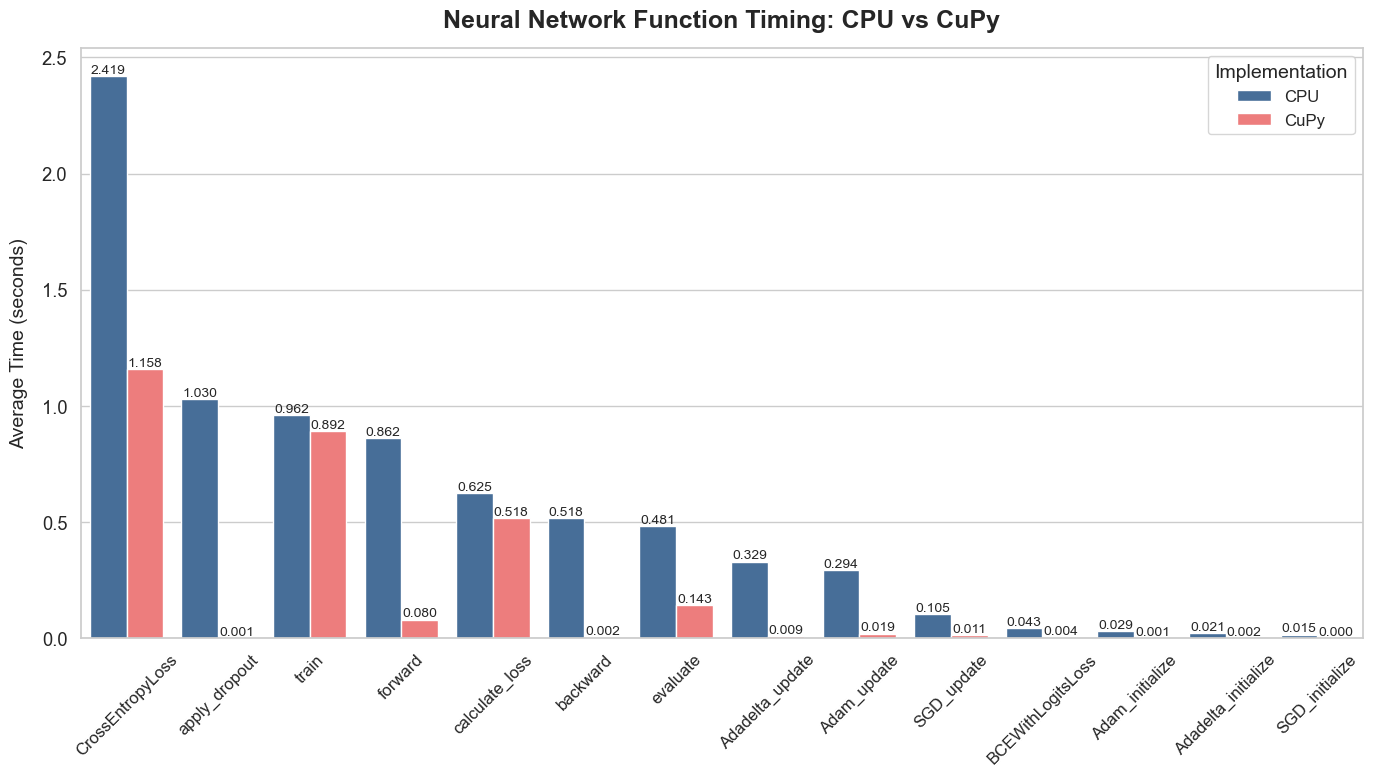

In [68]:
# First plot: Timing comparison
plt.figure(figsize=(14, 8))
melted_data = pd.melt(pivot_results, id_vars=['Function'], value_vars=['CPU', 'CuPy'])
melted_data.rename(columns={'variable': 'Implementation'}, inplace=True)

sns.barplot(x='Function', y='value', hue='Implementation', 
            data=melted_data,
            palette=['#3A6EA5', '#FF6B6B'])

plt.title('Neural Network Function Timing: CPU vs CuPy', fontsize=18, fontweight='bold')
plt.ylabel('Average Time (seconds)', fontsize=14)
plt.xlabel('')
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Implementation', fontsize=12, title_fontsize=14)

# Add value labels on bars
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.3f', fontsize=10)

plt.tight_layout()
plt.show()

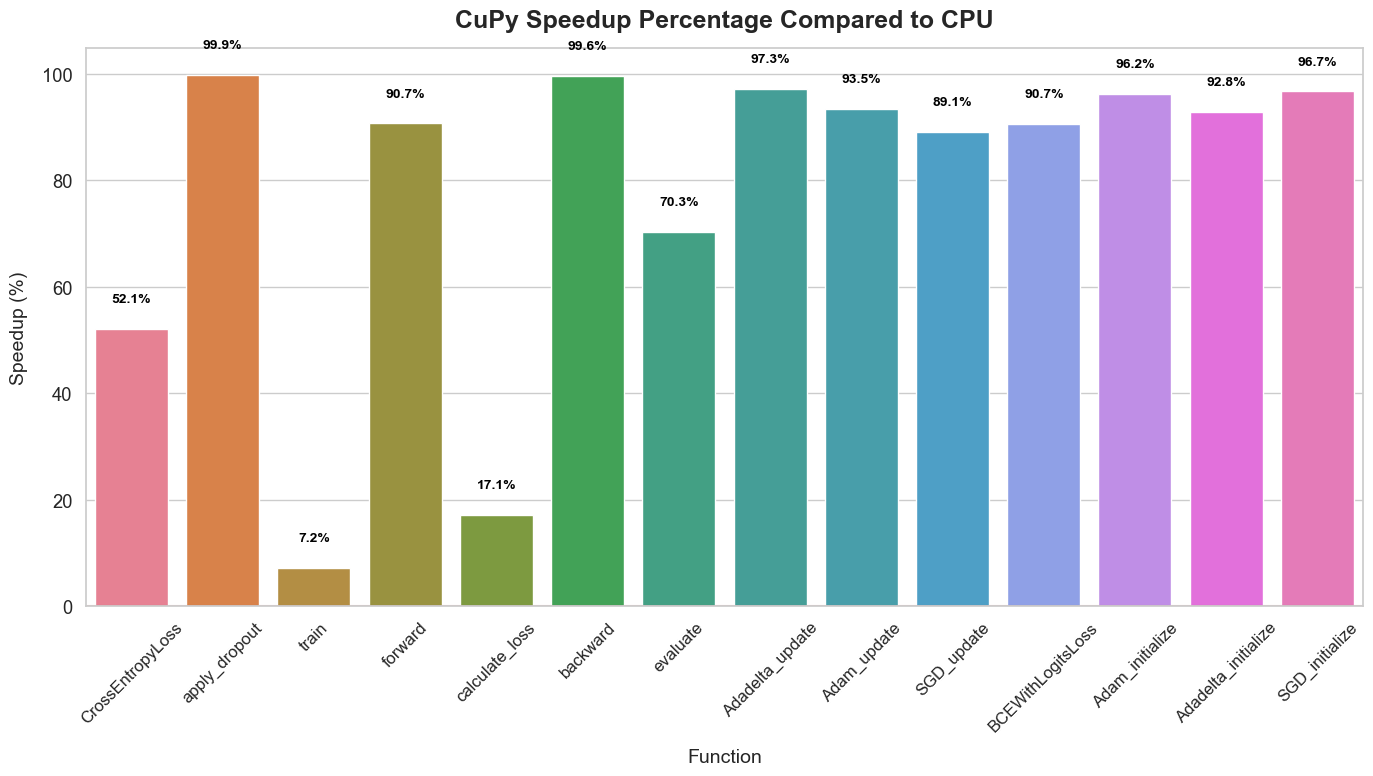

In [69]:
# Second plot: Speedup percentage
pivot_results.sort_values('Speedup (%)', ascending=False)

plt.figure(figsize=(14, 8))
speedup_bars = sns.barplot(x='Function', y='Speedup (%)', data=pivot_results, hue='Function')
plt.title('CuPy Speedup Percentage Compared to CPU', fontsize=18, fontweight='bold')
plt.ylabel('Speedup (%)', fontsize=14)
plt.xlabel('Function', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)

# Add value labels on speedup bars
for i, v in enumerate(pivot_results['Speedup (%)']):
    plt.text(i, max(v + 5, 5) if v > 0 else v - 15, 
             f"{v:.1f}%", ha='center', fontsize=10, 
             fontweight='bold', color='black')

# Highlight negative speedups (where CPU is faster)
for i, v in enumerate(pivot_results['Speedup (%)']):
    if v < 0:
        speedup_bars.patches[i].set_facecolor('#FF7F7F')  # Light red for negative speedup

plt.tight_layout()
plt.show()

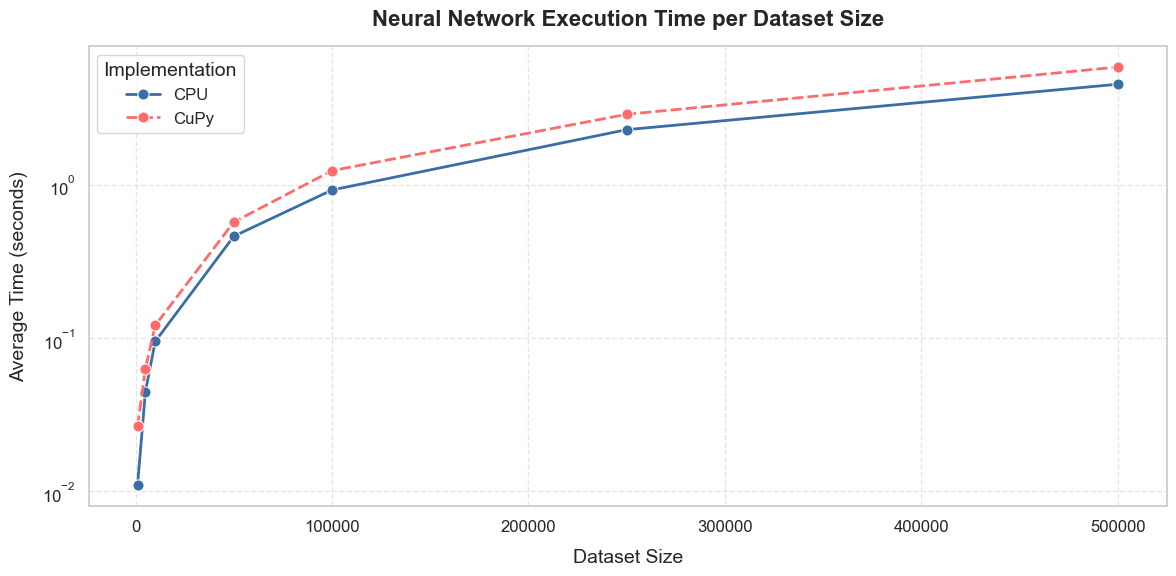

In [70]:
# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=epoch_results, x="Dataset Size", y="Average Time (s)", 
             hue="Implementation", marker="o", 
             palette=["#3A6EA5", "#FF6B6B"], 
             linewidth=2, markersize=8, 
             err_style="bars", err_kws={'capsize': 4}, 
             style="Implementation")

# Add title and labels
plt.title("Neural Network Execution Time per Dataset Size", fontsize=16, fontweight="bold")
plt.xlabel("Dataset Size", fontsize=14)
plt.ylabel("Average Time (seconds)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Implementation", fontsize=12, title_fontsize=14)

# log scale
plt.yscale("log")

# Show the plot
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()
